# 基础组件1：Pipeline

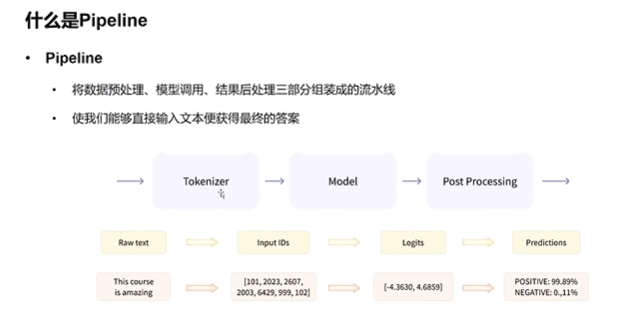

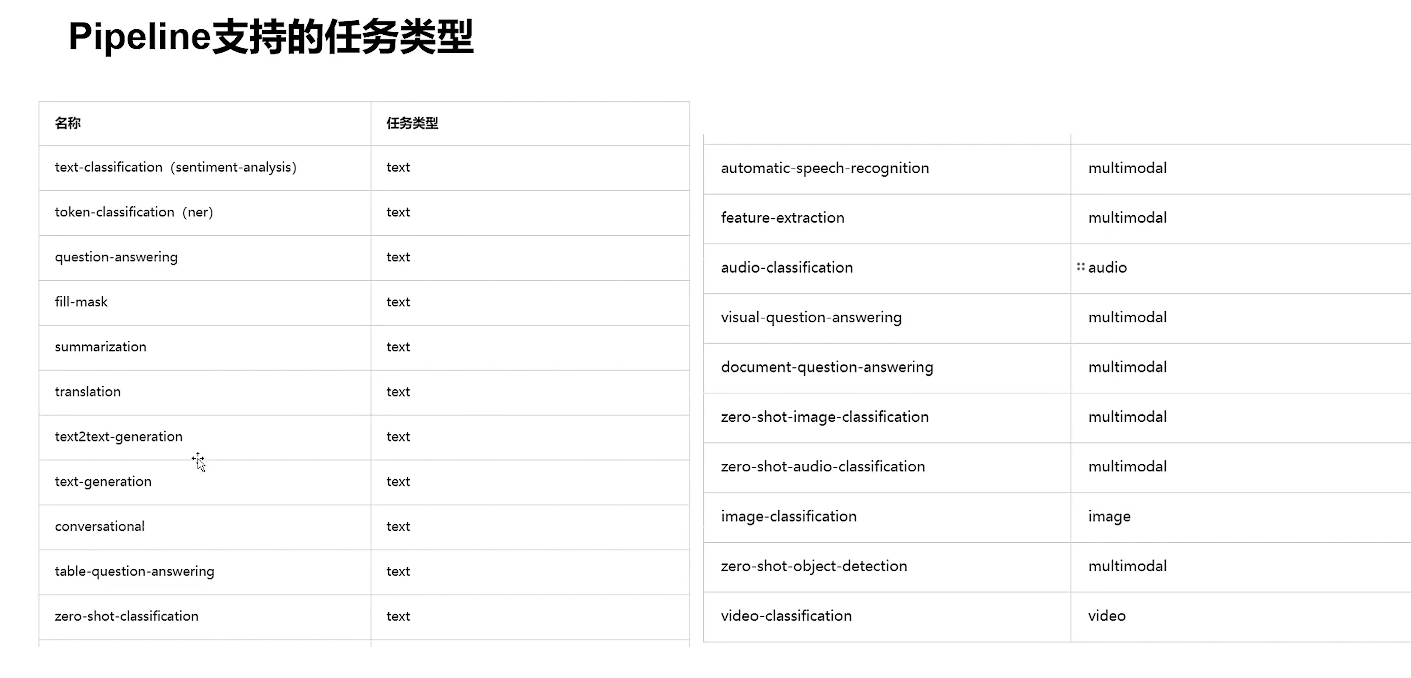

# 查看Pipeline支持的任务类型

In [1]:
from transformers.pipelines import SUPPORTED_TASKS

In [2]:
print(SUPPORTED_TASKS.items())

dict_items([('audio-classification', {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}), ('automatic-speech-recognition', {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}), ('text-to-audio', {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'defau

In [3]:
for k, v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

# Pipeline的创建与使用方式

In [1]:
from transformers import pipeline

/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


## 根据任务类型直接创建Pipeline, 默认都是英文的模型

In [ ]:
pipe = pipeline("text-classification")

In [ ]:
pipe(["very good!"])

## 指定任务类型，再指定模型，创建基于指定模型的Pipeline

In [4]:
# https://huggingface.co/models
# 任务类型：text-classification
# 指定模型：uer/roberta-base-finetuned-dianping-chinese
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

f:\Anaconda-env\LLMpython39\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in F:\FNii\LLM\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [5]:
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

## 预先加载模型，再创建Pipeline

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
# 这种方式，必须同时指定model和tokenizer
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

In [ ]:
pipe("我觉得不太行！")

In [6]:
pipe.model.device

device(type='cpu')

In [ ]:
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

## 使用GPU进行推理

In [ ]:
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese", device=0)
# device=0

In [ ]:
pipe.model.device

In [ ]:
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

## 确定Pipeline参数

In [ ]:
qa_pipe = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")

In [ ]:
qa_pipe

In [ ]:
QuestionAnsweringPipeline 

In [ ]:
qa_pipe(question="中国的首都是哪里？", context="中国的首都是北京", max_answer_len=1)

# 其他Pipeline示例

In [2]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection") # 零样本目标检测

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


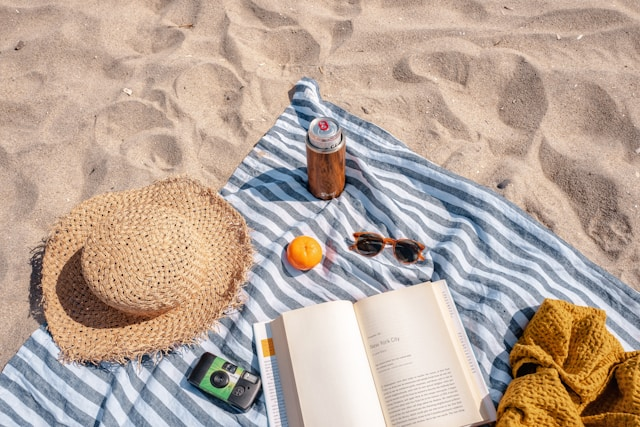

In [3]:
import requests
from PIL import Image

url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
im = Image.open(requests.get(url, stream=True).raw)
im

In [4]:
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses", "book"],  # zero-shot：可以随意指定我们要的类别标签
)
predictions

[{'score': 0.25451260805130005,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 429, 'ymax': 265}},
 {'score': 0.1838919222354889,
  'label': 'book',
  'box': {'xmin': 270, 'ymin': 284, 'xmax': 502, 'ymax': 427}},
 {'score': 0.11029074341058731,
  'label': 'hat',
  'box': {'xmin': 38, 'ymin': 173, 'xmax': 259, 'ymax': 363}}]

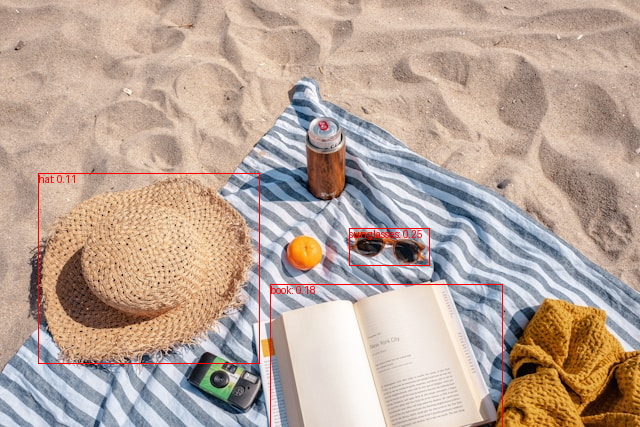

In [5]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im

# Pipeline背后的实现

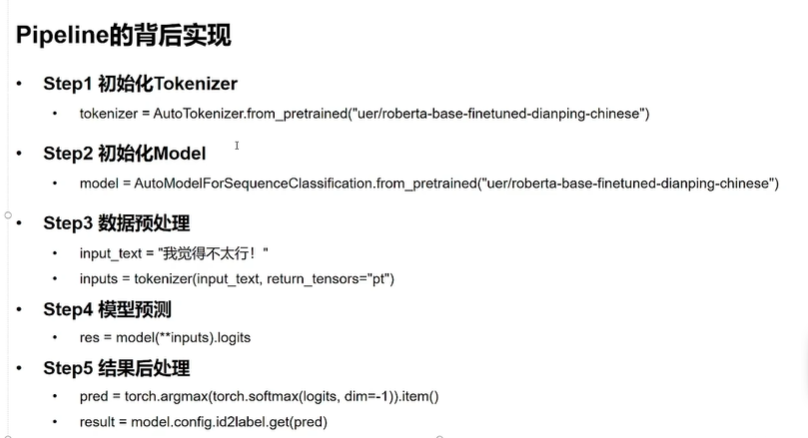

In [6]:
from transformers import *
import torch

/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/data1/zhengnanyan/miniconda3/envs/LLMpython39/lib/python3.9/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v4.40. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


In [7]:
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")

loading configuration file config.json from cache at /data1/zhengnanyan/huggingface/models--uer--roberta-base-finetuned-dianping-chinese/snapshots/25faf1874b21e76db31ea9c396ccf2a0322e0071/config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_

In [8]:
input_text = "我觉得不太行！"
inputs = tokenizer(input_text, return_tensors="pt")
inputs

{'input_ids': tensor([[ 101, 2769, 6230, 2533,  679, 1922, 6121, 8013,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [9]:
res = model(**inputs)
res

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7376, -1.8681]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [10]:
logits = res.logits # 预测的内容
logits = torch.softmax(logits, dim=-1)
logits

tensor([[0.9736, 0.0264]], grad_fn=<SoftmaxBackward0>)

In [11]:
# argmax：取出最大值的下标，item()转换成数字
pred = torch.argmax(logits).item()
pred

0

怎么看数字：

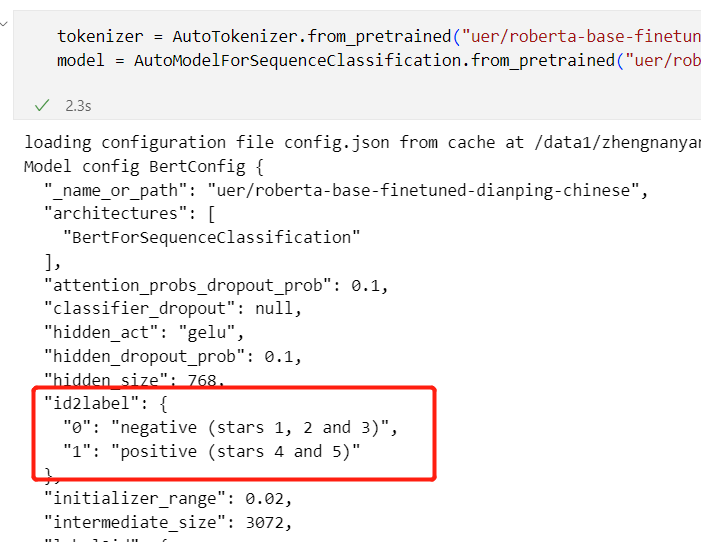

In [12]:
model.config.id2label

{0: 'negative (stars 1, 2 and 3)', 1: 'positive (stars 4 and 5)'}

In [13]:
result = model.config.id2label.get(pred)
result

'negative (stars 1, 2 and 3)'